In [46]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, display_latex

Hago variar n $\in[0,1,2,3,4]$ y
tomo $\omega$ = $\hbar$ = 1

In [48]:
N = 5
omega = 1.0
hbar = 1.0

Ahora defino los operadores aniquilación y creación para poder construir el hamiltoniano. $a$, $a^{\dag}$

In [47]:
a = destroy(N)
adag = a.dag() 

n = num(N) #Operador número
n2 = adag@a
display(n,n2) #Esto para comprobar que el operador número es igual al producto de a+ y a

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 4.]]

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 4.]]

Ahora necesito el hamiltoniano

In [35]:
H = omega*hbar*(adag*a + 0.5)
display(H)

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.5 0.  0.  0.  0. ]
 [0.  1.5 0.  0.  0. ]
 [0.  0.  2.5 0.  0. ]
 [0.  0.  0.  3.5 0. ]
 [0.  0.  0.  0.  4.5]]

Diagonal y hemítica, check! Ahora voy a definir un estado, un ket, y aplicarle el hamiltoniano

In [52]:
psi0 = basis(N,0) #En teoría, es el estado fundamental
display(psi0)

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

type = "ket", muy bien!

In [37]:
H@psi0

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[0.5]
 [0. ]
 [0. ]
 [0. ]
 [0. ]]

Si aplico H a $\psi_{0}$ obtengo el mismo ket multiplicado por el autovalor, check!!

In [38]:
H_expect = expect(H,psi0)
print(H_expect)

0.5


In [39]:
eigenvalues, eigenvectors= H.eigenstates()
for eigenvector in eigenvectors:
    display(eigenvector)

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]

Queda plottear las energías en función de n

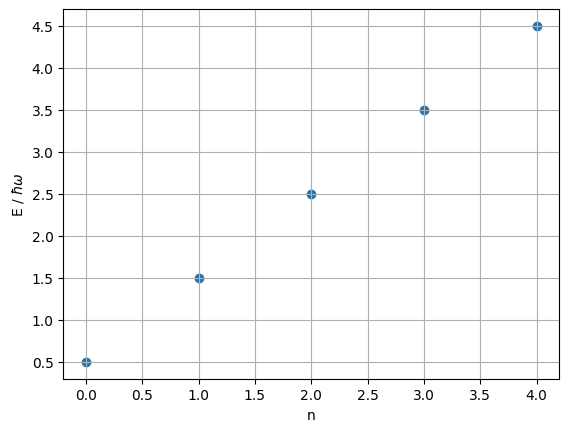

In [51]:
n_values = np.arange(N)

plt.scatter(n_values,eigenvalues)
plt.xlabel("n")
plt.ylabel("E / $ \\hbar\\omega$")
plt.grid()

Se obtiene el resultado esperado